In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

zip_path = "/content/drive/MyDrive/Colab Notebooks/Money_plant_disease/archive_8.zip"  # Update with your actual zip file path
extract_path = "/content/drive/MyDrive/Colab Notebooks/Moneyplant Disease Classification/"  # Update with the desired extraction directory

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully!")

Dataset extracted successfully!


In [ ]:
!pip install split-folders

In [ ]:
import splitfolders

# Define dataset path
data_dir = "/content/drive/MyDrive/Colab Notebooks/Moneyplant Disease Classification/Main Dataset"
split_dir = "/content/drive/MyDrive/Colab Notebooks/Moneyplant Disease Classification/split_dir/"  # Path to store split data

# Split dataset into train (70%), validation (15%), and test (15%)
splitfolders.ratio(data_dir, output=split_dir, seed=42, ratio=(0.7, 0.15, 0.15))

# Define paths for train, validation, and test
data_train = f"{split_dir}/train"
data_val = f"{split_dir}/val"
data_test = f"{split_dir}/test"

# Image Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255, rotation_range=30, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2, zoom_range=0.2,
    horizontal_flip=True, fill_mode='nearest')

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

Copying files: 15000 files [05:52, 42.52 files/s]


In [ ]:
# Load data
train_generator = train_datagen.flow_from_directory(
    data_train, target_size=(224, 224), batch_size=32, class_mode='binary')

val_generator = val_test_datagen.flow_from_directory(
    data_val, target_size=(224, 224), batch_size=32, class_mode='binary')

test_generator = val_test_datagen.flow_from_directory(
    data_test, target_size=(224, 224), batch_size=32, class_mode='binary', shuffle=False)

Found 10500 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.
Found 2250 images belonging to 3 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential

# Define the number of classes
num_classes = 3  # Change this according to your dataset

# Define CNN model
model = Sequential()

# First convolutional block
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Second convolutional block
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Third convolutional block
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Fully connected layers
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.5))

# Output layer for multiclass classification
model.add(Dense(num_classes, activation='softmax'))  # Use softmax for multiclass classification

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',  # ✅ Use this for integer labels
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,397,635 (169.36 MB)

 Trainable params: 44,397,635 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 232s 662ms/step - accuracy: 0.4421 - loss: 6.8861 - val_accuracy: 0.6973 - val_loss: 2.0008
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 180s 546ms/step - accuracy: 0.7026 - loss: 1.6166 - val_accuracy: 0.9049 - val_loss: 0.8834
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 182s 552ms/step - accuracy: 0.8806 - loss: 0.7535 - val_accuracy: 0.9738 - val_loss: 0.4824
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 181s 550ms/step - accuracy: 0.9346 - loss: 0.4643 - val_accuracy: 0.9618 - val_loss: 0.3661
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 180s 547ms/step - accuracy: 0.9502 - loss: 0.3358 - val_accuracy: 0.9756 - val_loss: 0.2991
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 180s 545ms/step - accuracy: 0.9628 - loss: 0.2724 - val_accuracy: 0.9800 - val_loss: 0.2290
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 181s 549ms/step - accuracy: 0.9655 - loss: 0.2382 - val_accuracy: 0.9867 - val_loss: 0.1922
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 200s 543ms/step - accuracy: 0.9741 -

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.9916 - loss: 0.1445
Test Accuracy: 0.9898


In [ ]:
# Check the keys of the history object
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [ ]:
# Save model
# model.save("bird_vs_drone_densenet.h5")

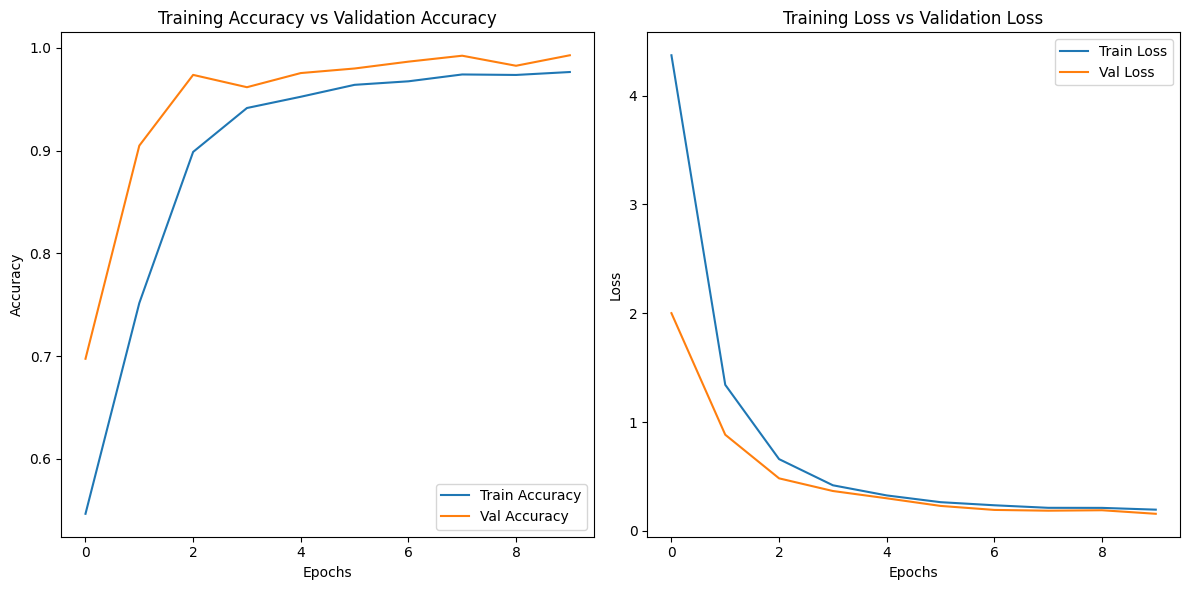

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' is the object returned by model.fit() previously
# If not already saved, you can retrieve it from the training process

# Plotting Training Accuracy vs Validation Accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Training Accuracy vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step


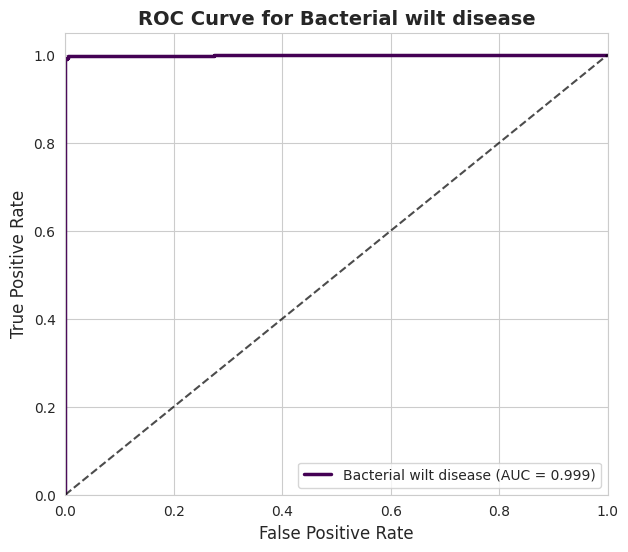

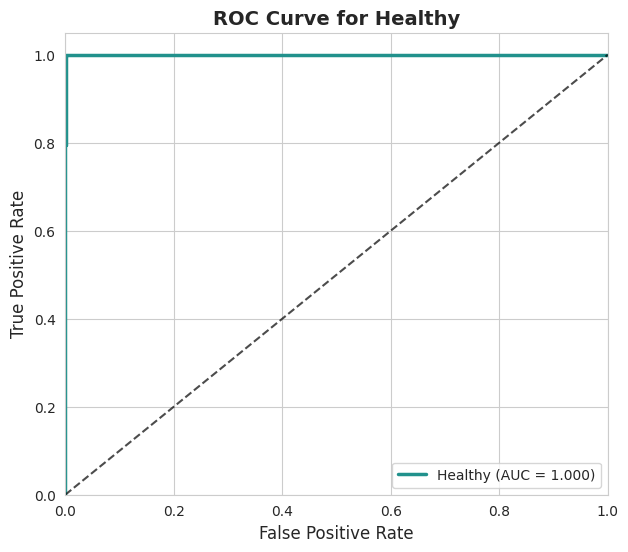

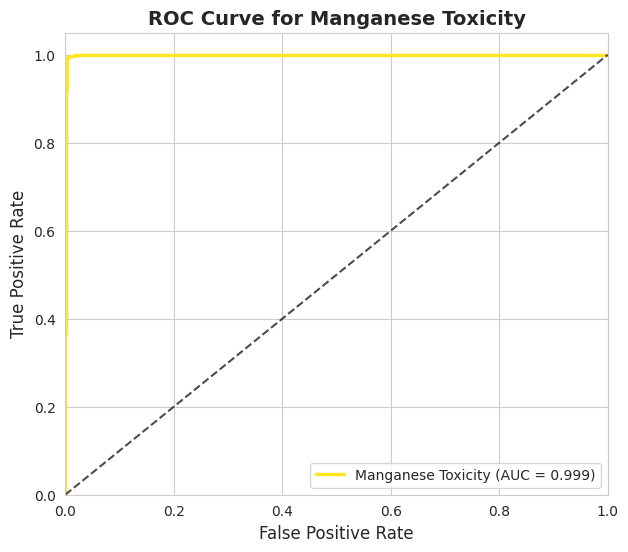

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical
import seaborn as sns

# Use Seaborn for improved visuals
sns.set_style("whitegrid")

# Get the number of classes
num_classes = len(set(test_generator.classes))

# Get true labels and predicted probabilities
y_true = test_generator.classes  # Ground truth labels (integer-encoded)
y_true_one_hot = to_categorical(y_true, num_classes)  # Convert to one-hot encoding
y_pred_prob = model.predict(test_generator)  # Predicted probabilities

# Map the integer class labels to class names (assuming this is available)
class_names = list(test_generator.class_indices.keys())  # Get class names from the generator

# Define color map
colors = plt.cm.viridis(np.linspace(0, 1, num_classes))

# Compute and plot separate ROC-AUC for each class
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_one_hot[:, i], y_pred_prob[:, i])  # Compute ROC curve
    roc_auc = auc(fpr, tpr)  # Compute AUC

    # Create separate figure for each class
    plt.figure(figsize=(7, 6))
    plt.plot(fpr, tpr, color=colors[i], lw=2.5, label=f'{class_names[i]} (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=1.5, alpha=0.7)  # Reference line

    # Labels and title
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title(f'ROC Curve for {class_names[i]}', fontsize=14, fontweight='bold')
    plt.legend(loc='lower right', fontsize=10)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])

    # Show plot for each class separately
    plt.show()

In [ ]:
from sklearn.metrics import f1_score

# Get true labels (integer-encoded)
y_true = test_generator.classes  # Ground truth labels (0, 1, 2, ...)

# Get predicted class labels
y_pred_prob = model.predict(test_generator)  # Predicted probabilities
y_pred = y_pred_prob.argmax(axis=1)  # Convert to class labels

# Compute F1 Score for multiclass classification (weighted average)
f1 = f1_score(y_true, y_pred, average='weighted')  # Can use 'macro' or 'micro' as well
print(f"F1 Score: {f1:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step
F1 Score: 0.9898


In [ ]:
from sklearn.metrics import precision_score, recall_score

# Compute Precision and Recall for Multiclass Classification
precision = precision_score(y_true, y_pred, average='weighted')  # Can use 'macro' or 'micro'
recall = recall_score(y_true, y_pred, average='weighted')  # Can use 'macro' or 'micro'

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Precision: 0.9900
Recall: 0.9898
